In [ ]:
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import simulate
import plotting

In [ ]:
DATA_FOLDER = "data_experiments/"

In [3]:
def plot_mean_and_confidence(plot_range, mean, mean_label, confidence_interval, 
                             confidence_interval_title):
    """
    Plot the mean and some kind of confidence interval (standard deviation or
    mean-squared-error)
    
    Parameters:
    ----------
    plot_range: iterable
    mean: an iterable
        the mean of the values at that point
    confidence_interval: an iterable
        Representing the  interval of confidence in that point. 
        The iterable should have length plot_range.
    confidence_interval_title: a string
    
    """
    
    lower_bound = np.array(mean)-np.array(confidence_interval)
    upper_bound = np.array(mean)+np.array(confidence_interval)
    plt.plot(plot_range, mean, label=mean_label)
    plt.fill_between(plot_range, lower_bound, upper_bound, 
                     label='{}'.format(confidence_interval_title),
                     alpha=0.2)

def plot_results(*args, **kwargs):
    """plot results from simulations
    
    Parameters:
        args: 1 or more dicts. The dicts should have for the keys numerical
            input values and for the values iterables of numbers.
        kwargs: at least the arguments xlabel, ylabel, title
        
    """
    for argument in args:
        data, meta_dict = argument
        variable_range, mean, std, batches_std = (
            find_mean_std_mse(data, 10)
        )
        
        if kwargs['std_of_batches']: 
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     batches_std, "batches stdev")
        else:
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     std, "stdev")
    
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.legend()
    plt.title(kwargs['title'])
    plt.show()


### First load the data

#### Relation MI and nudge impact for 1 input and 1 output 

In [ ]:
import math

#FILE_PATH = DATA_FOLDER + "relation_MI_nudge_impact_1input.json"
FILE_PATH = DATA_FOLDER + "relation_MI_nudge_impact_1input_non_biased.json"
with open(FILE_PATH, 'r') as f:
    data_dict = json.load(f)

for mi_value, values in data_dict.items():
    data_dict[int(float(mi_value)*100)/100.0] = values
    data_dict.pop(mi_value, None)
 
for mi_value in data_dict:
    data_dict[mi_value] = [number for number in data_dict[mi_value] if not math.isinf(number)]
    
#print(data_dict.keys())
#data_dict[0.75] = [number for number in data_dict[0.75] if not math.isinf(number)]

In [ ]:
# with open("data_experiments/relation_MI_nudge_impact_1input_non_biased2.json", 'r') as f:
#     data_dict1 = json.load(f)

# with open("data_experiments/relation_MI_nudge_impact_1input_non_biased3.json", 'r') as f:
#     data_dict2 = json.load(f)
    
# data_dict1.update(data_dict2)
# data_dict = data_dict1

with open("data_experiments/relation_MI_nudge_impact_1input_non_biased3.json", 'r') as f:
    data_dict = json.load(f)

with open("data_experiments/relation_MI_nudge_impact_1input_non_biased4.json", 'r') as f:
    data_dict1 = json.load(f)

for mi_value, values in data_dict1.items():
    data_dict1[int(float(mi_value)*100)/100.0] = values
    data_dict1.pop(mi_value, None)
    
for mi_value, values in data_dict.items():
    data_dict[int(float(mi_value)*100)/100.0] = values
    data_dict.pop(mi_value, None)

data_dict[0.95] = data_dict1[0.95]

#data_dict[0.80] = [i for i in data_dict[0.80] if i*1000 < 2]
#data_dict[0.90] = [i for i in data_dict[0.90] if i*1000 < 2]
#data_dict[0.95]

[  4.31366918e-06   4.30673459e-06   1.94023715e-05   2.30318712e-05
   2.68234375e-05  -1.78889610e-06   4.26572941e-05   6.44924128e-05
   5.74923830e-05   6.26813608e-05   7.56771653e-05   9.22769067e-05
   8.28192304e-05   9.78836712e-05   1.01926302e-04   1.14338511e-04
   2.73416636e-05   1.19826101e-04   1.42465709e-04]
[  1.90442142e-05   4.04008361e-05   4.03876307e-05   8.20344518e-05
   9.92283404e-05   1.51611646e-04   1.32753876e-04   1.39644571e-04
   1.39660050e-04   1.91066942e-04   1.43083906e-04   1.82527147e-04
   1.73847918e-04   2.39287343e-04   2.14204614e-04   2.19593336e-04
   3.38748413e-04   2.83360580e-04   2.95600033e-04]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


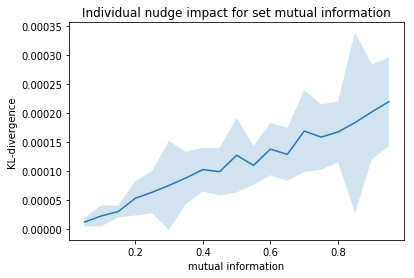

LinregressResult(slope=0.00021445608318173607, intercept=5.5102149553001075e-06, rvalue=0.98883005862460205, pvalue=1.7029653393988491e-15, stderr=7.8400085056150824e-06)

In [40]:
#plot_mean_and_confidence(plot_range, mean, "mean", std, "std")
lower_bound = np.array(mean)-np.array(std)
upper_bound = np.array(mean)+np.array(std)
print(lower_bound)
print(upper_bound)
print(plot_range)
plt.plot(plot_range, mean, label="mean")
plt.fill_between(plot_range, lower_bound, upper_bound, 
                 label='{}'.format("std"),
                 alpha=0.2)

plt.xlabel("mutual information")
plt.ylabel("KL-divergence")
#plt.legend()
plt.title('Individual nudge impact for set mutual information')
plt.show()

stats.linregress(np.array(plot_range), np.array(mean))

#### Maximum impact for individual, local, and global nudges for increasing number of variables

In [ ]:
with open("max_impact_individual_nudges_dirichlet_first100samples.json", 'r') as f:
    max_individual_impact_dict = json.load(f)

with open("max_impact_local_nudges_dirichlet.json", 'r') as f:
    max_local_impact_dict = json.load(f)

with open("max_impact_global_nudges_dirichlet_first200samples.json", 'r') as f:
    max_global_impact_dict = json.load(f)

In [ ]:
plot_range_individual, mean_individual, std_individual, batches_std_individual = simulate.find_mean_std_mse(
    max_individual_impact_dict, batch_size = 1
)
plot_range_individual = [float(item) for item in plot_range_individual]

plot_range_local, mean_local, std_local, batches_std_local = simulate.find_mean_std_mse(
    max_local_impact_dict, batch_size = 1
)
mean_local = np.array(mean_local)*-1 
mean_local = list(mean_local)
plot_range_local = [float(item) for item in plot_range_local]

plot_range_global, mean_global, std_global, batches_std_global = simulate.find_mean_std_mse(
    max_global_impact_dict, batch_size = 20
)
plot_range_global = [float(item) for item in plot_range_global]

print(mean_local)


In [ ]:
plot_range_local.insert(0, 1)
mean_local.insert(0, mean_individual[0])
std_local.insert(0, std_individual[0])
batches_std_local.insert(0, batches_std_individual[0])
plot_range_global.insert(0, 1)
mean_global.insert(0, mean_individual[0])
std_global.insert(0, std_individual[0])
batches_std_global.insert(0, batches_std_individual[0])

plot_mean_and_confidence(plot_range_individual, mean_individual, "individual impact", 
                         std_individual, "std indiv")

plot_mean_and_confidence(plot_range_local, mean_local, "impact local", 
                         std_local, "std local")

plot_mean_and_confidence(plot_range_global, mean_global, "global impact", 
                         std_global, "std global")


plt.xlabel('number of variables')
plt.ylabel('impact')
plt.legend()
plt.title('maximum impact nudges')
plt.show()

